In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score, KFold

# Carregando as variáveis train e validation do dataset CIC Train50

In [2]:
import pickle

In [3]:
with open('df_cic_train50_with_preprocessing_labelencoder_minmax', mode = 'rb') as f:
    X_train50_train, X_train50_test, y_train50_multiclass_train, y_train50_multiclass_test, y_train50_binary_train, y_train50_binary_test = pickle.load(f)

In [4]:
print('X treino = ', X_train50_train.shape)
print('X teste = ', X_train50_test.shape)
print('y multiclasse treino = ', y_train50_multiclass_train.shape)
print('y multiclasse teste = ', y_train50_multiclass_test.shape)
print('y binário treino = ', y_train50_binary_train.shape)
print('y binário teste = ', y_train50_binary_test.shape)

X treino =  (990755, 78)
X teste =  (424610, 78)
y multiclasse treino =  (990755,)
y multiclasse teste =  (424610,)
y binário treino =  (990755,)
y binário teste =  (424610,)


In [5]:
#X_train50_train.head()
X_train50_train

array([[4.46063490e-04, 5.03883405e-04, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [7.32194632e-01, 2.50000035e-07, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [4.46063490e-04, 1.43333354e-06, 4.55046005e-06, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [1.00754591e-01, 2.83741707e-04, 4.55046005e-06, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [8.17783064e-04, 1.15833350e-06, 4.55046005e-06, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [5.01821426e-04, 7.09192300e-01, 2.73027603e-05, ...,
        0.00000000e+00, 7.08333333e-01, 7.08333333e-01]])

In [6]:
print(type(X_train50_train))
print(type(y_train50_multiclass_train))
print(type(y_train50_binary_train))
print(type(X_train50_test))
print(type(y_train50_multiclass_test))
print(type(y_train50_binary_test))

<class 'numpy.ndarray'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'numpy.ndarray'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


In [7]:
#print(y_train50_multiclass_train.unique())
#print(y_train50_binary_train.unique())
print(y_train50_multiclass_train)
print(y_train50_binary_train)

1008718    BENIGN
1092907    BENIGN
1034897    BENIGN
727692     BENIGN
1200733    BENIGN
            ...  
259178     BENIGN
1414414    BENIGN
131932     BENIGN
671155     BENIGN
121958        DoS
Name: Label_multiclass, Length: 990755, dtype: object
1008718    0
1092907    0
1034897    0
727692     0
1200733    0
          ..
259178     0
1414414    0
131932     0
671155     0
121958     1
Name: Label_binary, Length: 990755, dtype: int64


In [8]:
print(type(X_train50_train))
print(type(y_train50_multiclass_train))
print(type(y_train50_binary_train))
print(type(X_train50_test))
print(type(y_train50_multiclass_test))
print(type(y_train50_binary_test))

<class 'numpy.ndarray'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'numpy.ndarray'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


In [9]:
#X_train50_train = X_train50_train.to_numpy()
y_train50_multiclass_train = y_train50_multiclass_train.to_numpy()
y_train50_binary_train = y_train50_binary_train.to_numpy()
#X_train50_test = X_train50_test.to_numpy()
y_train50_multiclass_test = y_train50_multiclass_test.to_numpy()
y_train50_binary_test = y_train50_binary_test.to_numpy()

In [10]:
print(type(X_train50_train))
print(type(y_train50_multiclass_train))
print(type(y_train50_binary_train))
print(type(X_train50_test))
print(type(y_train50_multiclass_test))
print(type(y_train50_binary_test))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


# Carregando as variáveis do dataset CIC Test50

In [11]:
with open('df_cic_test50_with_preprocessing_labelencoder_minmax', mode = 'rb') as f:
    X_test50, y_test50_multiclass, y_test50_binary = pickle.load(f)

In [12]:
print('X = ', X_test50.shape)
print('y multiclasse = ', y_test50_multiclass.shape)
print('y binário = ', y_test50_binary.shape)

X =  (1415365, 78)
y multiclasse =  (1415365,)
y binário =  (1415365,)


In [13]:
print(type(X_test50))
print(type(y_test50_multiclass))
print(type(y_test50_binary))

<class 'numpy.ndarray'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


In [14]:
y_test50_multiclass = y_test50_multiclass.to_numpy()
y_test50_binary = y_test50_binary.to_numpy()

In [15]:
print(type(X_test50))
print(type(y_test50_multiclass))
print(type(y_test50_binary))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [16]:
#y_test50_binary.value_counts()
y_test50_binary

array([0, 0, 0, ..., 0, 0, 1])

In [17]:
#y_test50_multiclass.value_counts()
y_test50_multiclass

array(['BENIGN', 'BENIGN', 'BENIGN', ..., 'BENIGN', 'BENIGN', 'PortScan'],
      dtype=object)

In [18]:
#X_test50.head()
X_test50

array([[5.01821426e-04, 3.38626715e-03, 9.10092010e-06, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [4.46063490e-04, 5.08433405e-04, 4.55046005e-06, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.44970634e-03, 2.58366703e-04, 4.55046005e-06, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [4.46063490e-04, 5.45183411e-04, 4.55046005e-06, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [7.05560925e-01, 3.05008377e-04, 4.55046005e-06, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [3.22652591e-02, 4.91666736e-07, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [19]:
#print(y_test50_multiclass.unique())
#print(y_test50_binary.unique())
print(y_test50_multiclass)
print(y_test50_binary)

['BENIGN' 'BENIGN' 'BENIGN' ... 'BENIGN' 'BENIGN' 'PortScan']
[0 0 0 ... 0 0 1]


In [20]:
#X_test50.shape

In [21]:
# verifica detalhes das variáveis
# variáveis nominais: #proto #state #service #ct_ftp_cmd
#df_unsw_full.shape
#df_unsw_full.describe()
#df_unsw_full.dtypes
#y_test50_multiclass.value_counts()
#np.unique(df_unsw_full['sport'])
#len(np.unique(df_unsw_full.ct_ftp_cmd))

# Algoritmo LightBGM para Train e Validation - Train50

In [22]:
!pip3 install lightgbm

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.


In [23]:
import lightgbm as lgb

### Predição train50 binária

In [24]:
lgb_train50_binary = lgb.LGBMClassifier(objective='binary', n_estimators=100, max_depth=8, random_state=42)

In [25]:
lgb_train50_binary.fit(X_train50_train, y_train50_binary_train)

LGBMClassifier(max_depth=8, objective='binary', random_state=42)

In [26]:
predict_train50_binary = lgb_train50_binary.predict(X_train50_test)

In [27]:
predict_train50_binary

array([0, 0, 0, ..., 0, 0, 0])

In [28]:
y_train50_binary_test

array([0, 0, 0, ..., 0, 0, 0])

In [29]:
accuracy_score(y_train50_binary_test, predict_train50_binary)

0.999724453027484

### Visualização da árvore binária

In [30]:
from sklearn import tree
#from dtreeviz.trees import dtreeviz
from matplotlib import pyplot as plt
plt.rcParams.update({'figure.figsize': (12.0, 8.0)})
plt.rcParams.update({'font.size': 14})

In [31]:
#plt.figure(figsize=(20,10))
#grafic = tree.plot_tree(xgb_train50_binary.estimators_[0], feature_names=X_train50_train.columns, filled=True)

In [32]:
#viz = dtreeviz(xgb_train50_binary.estimators_[0], X_train50_train, y_train50_binary_train, feature_names=X_train50_train.columns, target_name='Label_binary')
#viz

<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

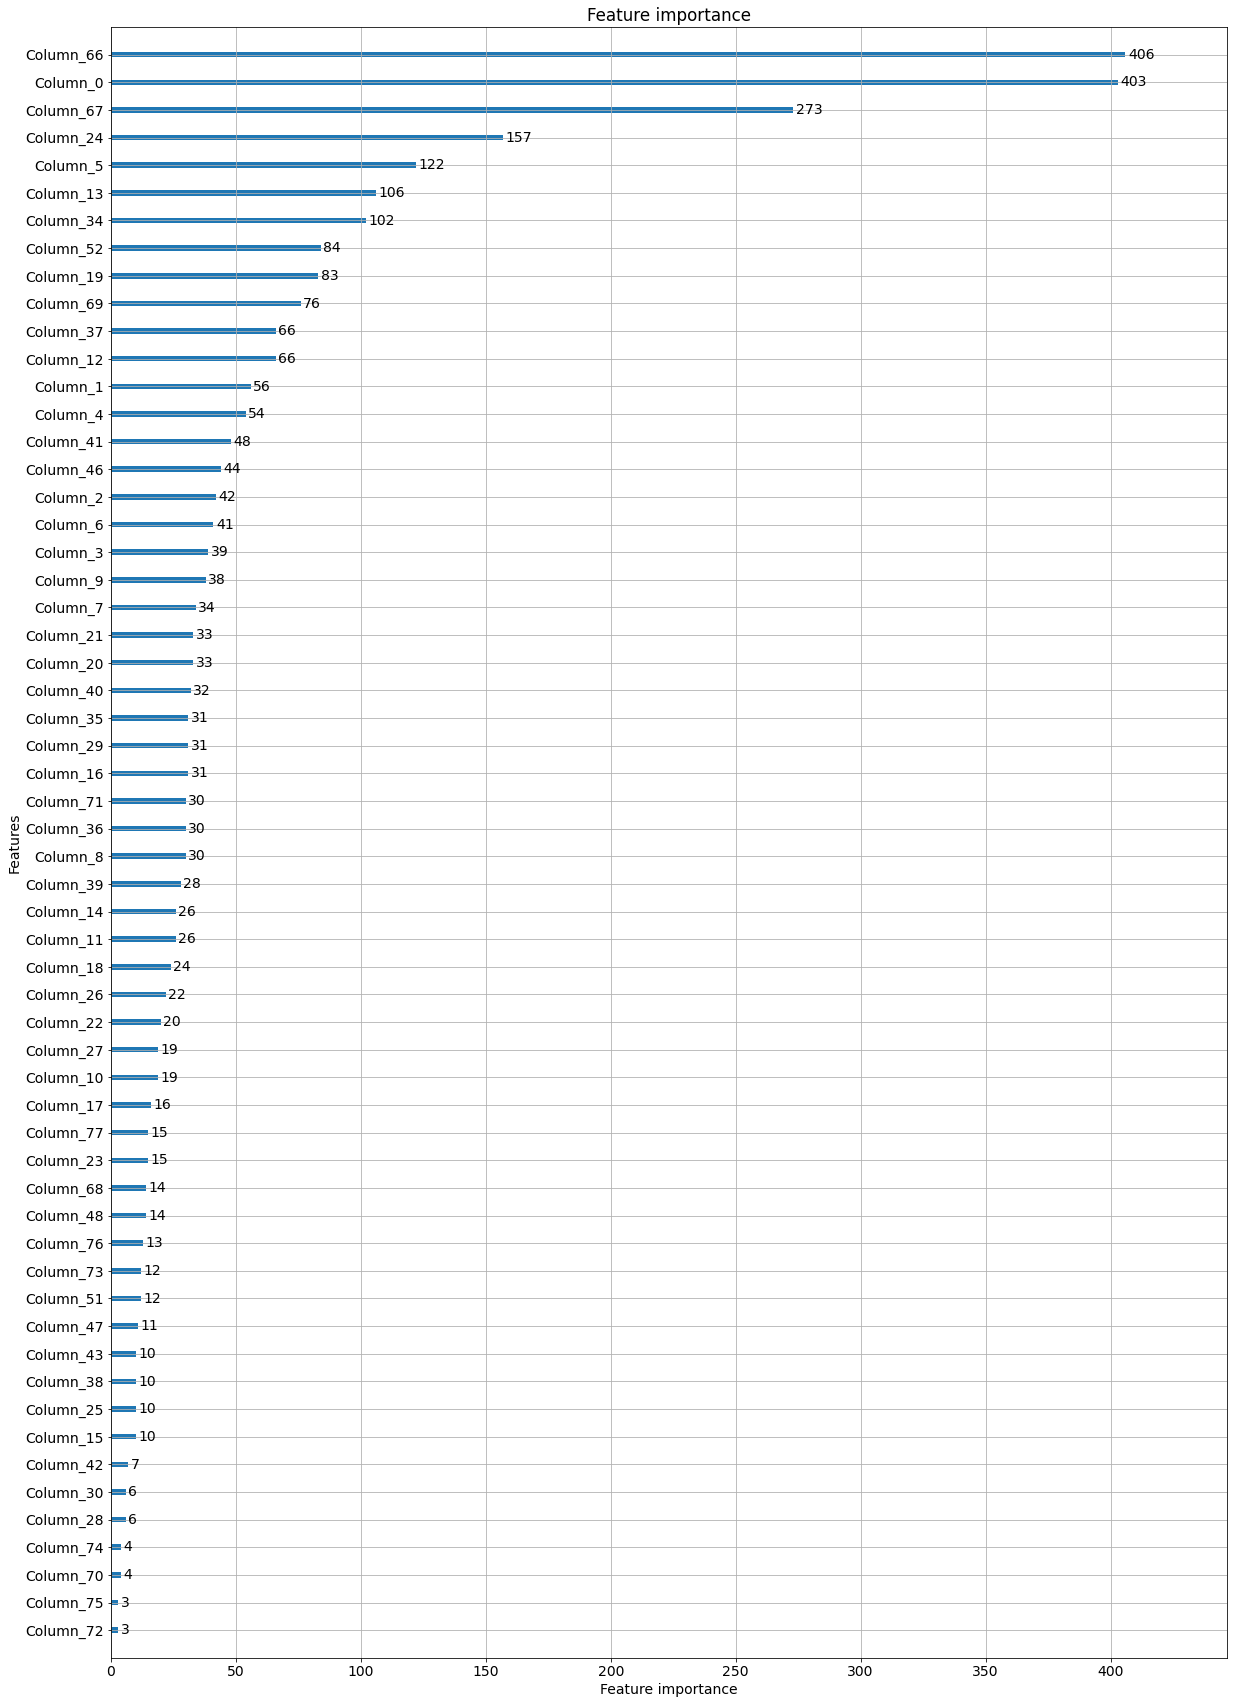

In [33]:
fig, ax = plt.subplots(figsize=(20,30))
lgb.plot_importance(lgb_train50_binary, ax=ax)

### Predição train50 multiclasse

In [34]:
lgb_train50_multiclass = lgb.LGBMClassifier(objective='multiclass', n_estimators=100, max_depth=8, random_state=42)

In [35]:
lgb_train50_multiclass.fit(X_train50_train, y_train50_multiclass_train)

LGBMClassifier(max_depth=8, objective='multiclass', random_state=42)

In [36]:
predict_train50_multiclass = lgb_train50_multiclass.predict(X_train50_test)

In [37]:
predict_train50_multiclass

array(['BENIGN', 'BENIGN', 'BENIGN', ..., 'BENIGN', 'DoS', 'BENIGN'],
      dtype=object)

In [38]:
y_train50_multiclass_test

array(['BENIGN', 'BENIGN', 'BENIGN', ..., 'BENIGN', 'BENIGN', 'BENIGN'],
      dtype=object)

In [39]:
accuracy_score(y_train50_multiclass_test, predict_train50_multiclass)

0.8532747697887473

### Visualização da árvore multiclasse

In [40]:
#plt.figure(figsize=(20,10))
#grafic = tree.plot_tree(xgb_train50_multiclass.estimators_[0], feature_names=X_train50_train.columns, filled=True)

In [41]:
#viz = dtreeviz(xgb_train50_multiclass.estimators_[0], X_train50_train, y_train50_multiclass_train, feature_names=X_train50_train.columns, target_name='Label_multiclass')
#viz

<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

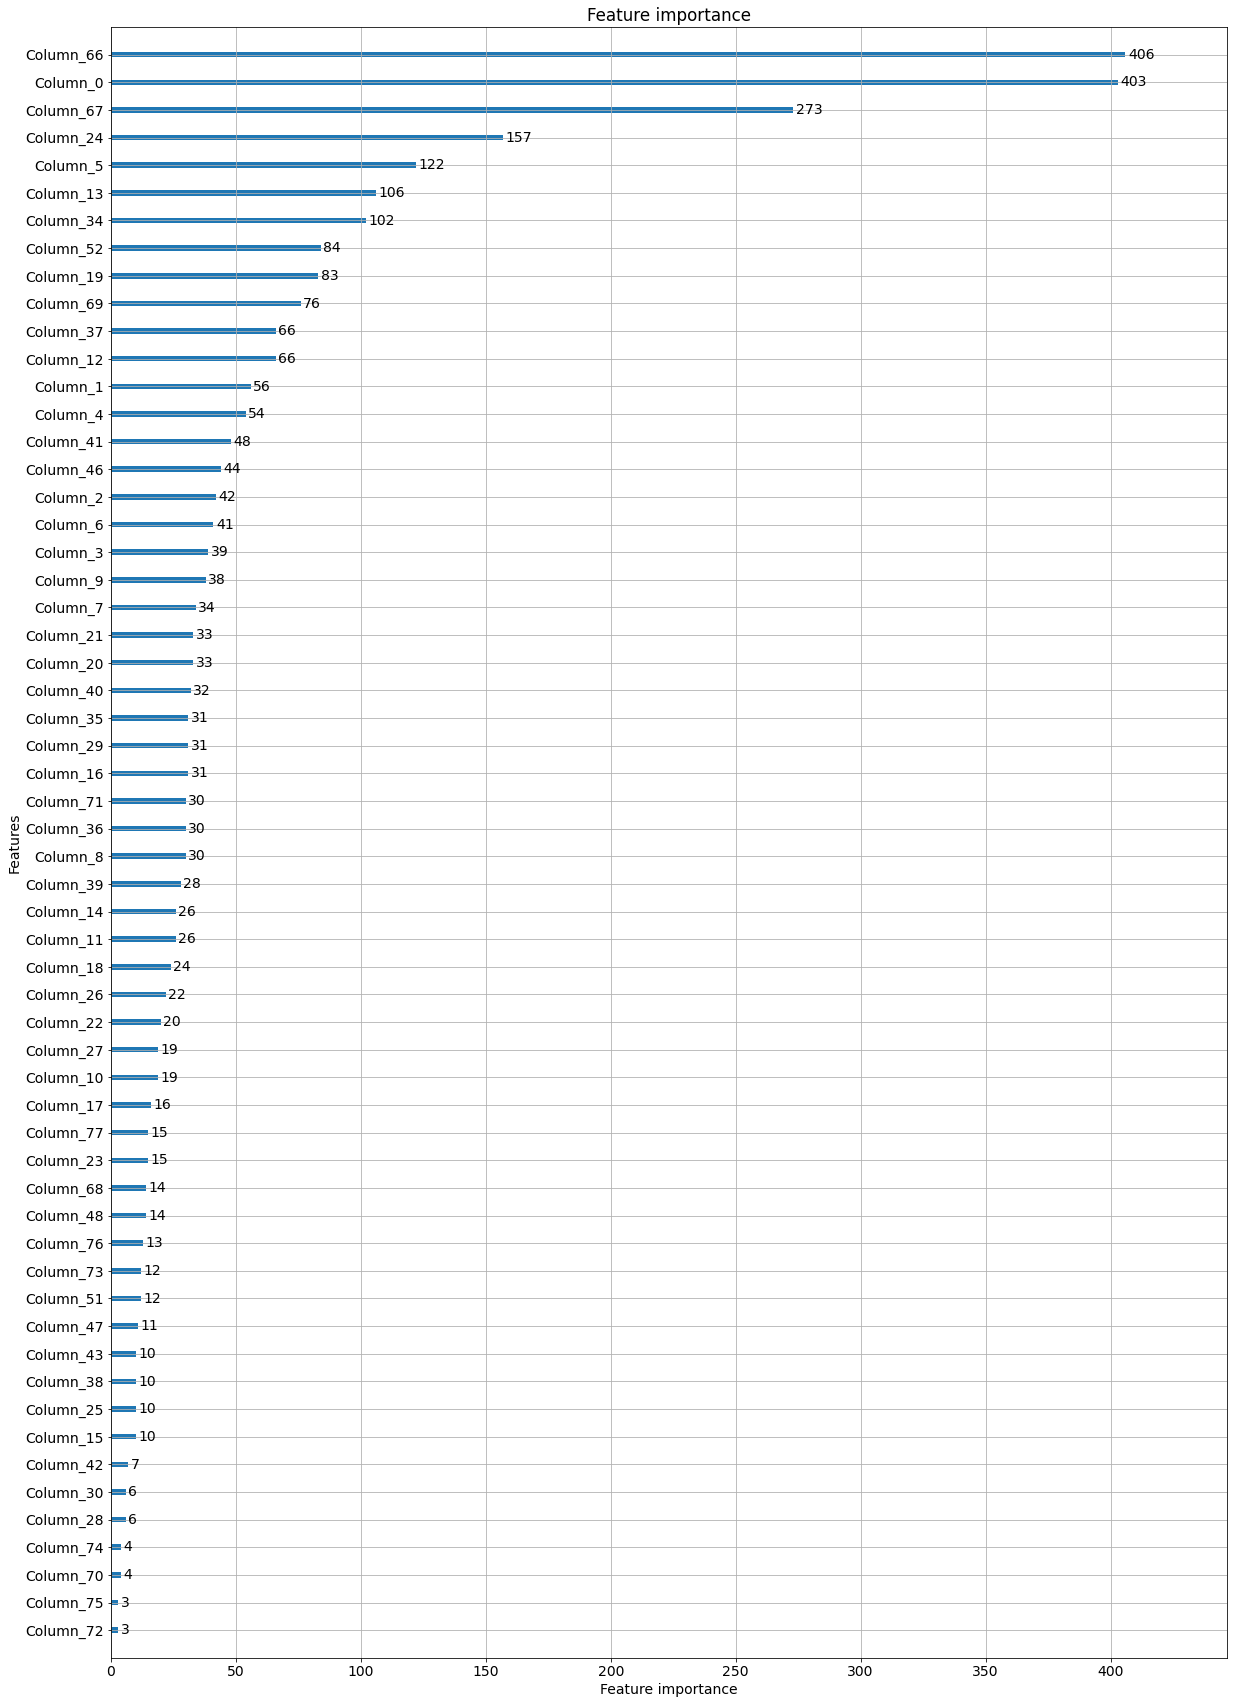

In [42]:
fig, ax = plt.subplots(figsize=(20,30))
lgb.plot_importance(lgb_train50_binary, ax=ax)

In [43]:
#lgb.plot_tree(lgb_train50_binary, figsize=(20,6), tree_index=0, dpi=100)

### Precision e Recall do train50

In [44]:
print(classification_report(y_train50_binary_test, predict_train50_binary, digits=6, zero_division=1))

              precision    recall  f1-score   support

           0   0.999859  0.999798  0.999828    340989
           1   0.999175  0.999426  0.999301     83621

    accuracy                       0.999724    424610
   macro avg   0.999517  0.999612  0.999564    424610
weighted avg   0.999724  0.999724  0.999724    424610



In [45]:
print(classification_report(y_train50_multiclass_test, predict_train50_multiclass, digits=6, zero_division=1))

              precision    recall  f1-score   support

      BENIGN   0.891482  0.949485  0.919570    340989
      BotNet   0.000000  0.000000  0.000000       312
  BruteForce   0.000000  0.000000  0.000000      2093
        DDoS   0.785049  0.567524  0.658795     19171
         DoS   0.659394  0.596707  0.626486     37836
  Heartbleed   0.000000  0.000000  0.000000         1
Infiltration   0.000000  0.000000  0.000000         5
    PortScan   0.825170  0.213021  0.338624     23885
   WebAttack   0.000000  0.000000  0.000000       318

    accuracy                       0.853275    424610
   macro avg   0.351233  0.258526  0.282608    424610
weighted avg   0.856536  0.853275  0.843091    424610



### Cross Validation do train50

In [46]:
# cross validation binary
cv_result_train50_binary = []
kfold = KFold(n_splits=10, shuffle=True, random_state=42)   
score_cv_train50_binary = cross_val_score(lgb_train50_binary, X_train50_train, y_train50_binary_train, cv=kfold)
cv_result_train50_binary.append(score_cv_train50_binary.mean())

In [47]:
score_cv_train50_binary

array([0.99975776, 0.99971739, 0.9997073 , 0.99974767, 0.99974767,
       0.9996972 , 0.99980823, 0.99973757, 0.99959627, 0.9996972 ])

In [48]:
cv_result_train50_binary

[0.9997214244988315]

In [49]:
# cross validation multiclass
cv_result_train50_multiclass = []
kfold = KFold(n_splits=10, shuffle=True, random_state=42)   
score_cv_train50_multiclass = cross_val_score(lgb_train50_multiclass, X_train50_train, y_train50_multiclass_train, cv=kfold)
cv_result_train50_multiclass.append(score_cv_train50_multiclass.mean())

In [50]:
score_cv_train50_multiclass

array([0.78918204, 0.9499677 , 0.99112802, 0.9862126 , 0.82539667,
       0.79577088, 0.77860207, 0.78070149, 0.97522079, 0.88342165])

In [51]:
cv_result_train50_multiclass

[0.8755603917365267]

### Matriz de Confusão do train50

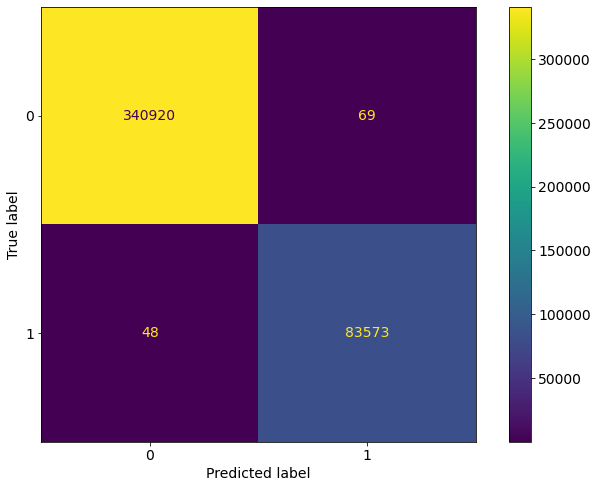

In [52]:
ConfusionMatrixDisplay.from_estimator(lgb_train50_binary, X_train50_test, y_train50_binary_test)
plt.show()

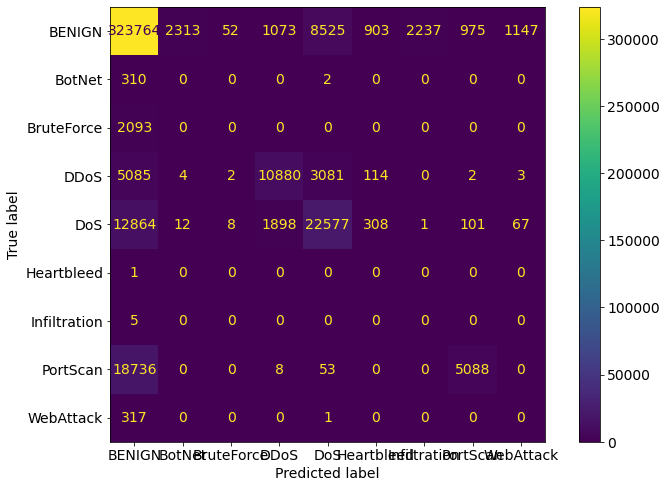

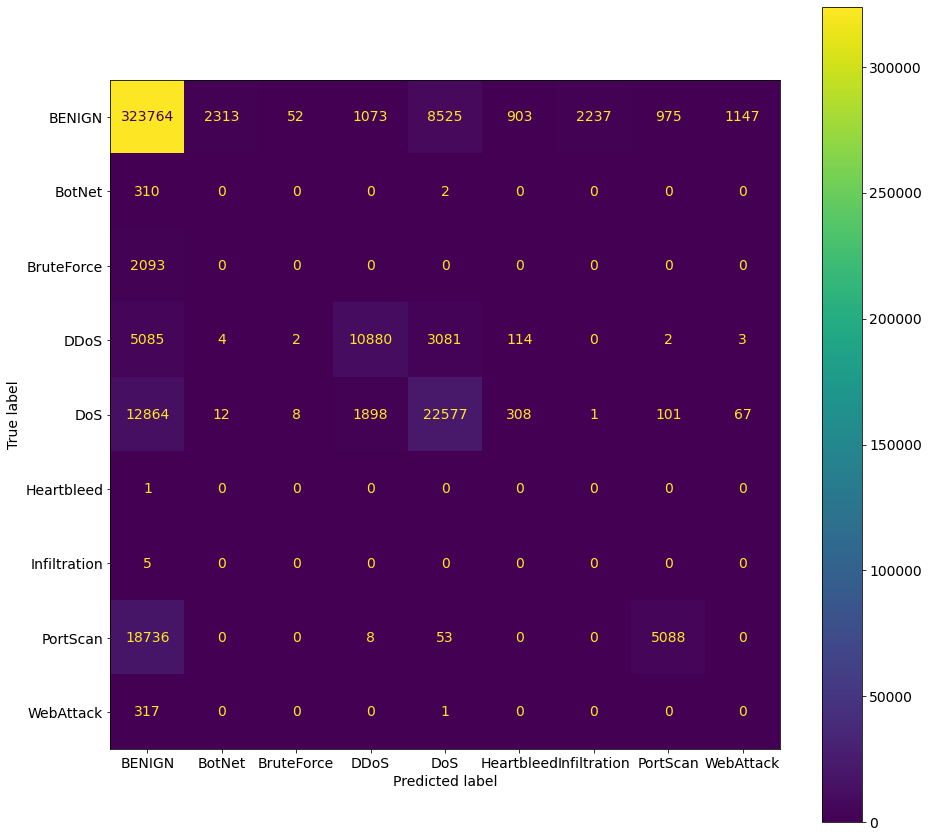

In [53]:
#ConfusionMatrixDisplay.from_estimator(xgb_train50_multiclass, X_train50_test, y_train50_multiclass_test)
#plt.show()

cm_lgb_multiclass_train = ConfusionMatrixDisplay.from_estimator(lgb_train50_multiclass, X_train50_test, y_train50_multiclass_test)
fig, ax = plt.subplots(figsize=(15,15))
cm_lgb_multiclass_train.plot(ax=ax)

# Algoritmo LightBGM para Test50

### Predição Test50 binária

In [54]:
predict_test50_binary = lgb_train50_binary.predict(X_test50)

In [55]:
predict_test50_binary

array([0, 0, 0, ..., 0, 0, 1])

In [56]:
y_test50_binary

array([0, 0, 0, ..., 0, 0, 1])

In [57]:
accuracy_score(y_test50_binary, predict_test50_binary)

0.9997710837840416

### Predição test50 multiclasse

In [58]:
predict_test50_multiclass = lgb_train50_multiclass.predict(X_test50)

In [59]:
predict_test50_multiclass

array(['BENIGN', 'BENIGN', 'BENIGN', ..., 'BENIGN', 'BENIGN', 'PortScan'],
      dtype=object)

In [60]:
y_test50_multiclass

array(['BENIGN', 'BENIGN', 'BENIGN', ..., 'BENIGN', 'BENIGN', 'PortScan'],
      dtype=object)

In [61]:
accuracy_score(y_test50_multiclass, predict_test50_multiclass)

0.8531792152554288

### Precision e Recall do test50

In [62]:
print(classification_report(y_test50_binary, predict_test50_binary, digits=6, zero_division=1))

              precision    recall  f1-score   support

           0   0.999901  0.999814  0.999857   1136548
           1   0.999243  0.999595  0.999419    278817

    accuracy                       0.999771   1415365
   macro avg   0.999572  0.999705  0.999638   1415365
weighted avg   0.999771  0.999771  0.999771   1415365



In [63]:
print(classification_report(y_test50_multiclass, predict_test50_multiclass, digits=6, zero_division=1))

              precision    recall  f1-score   support

      BENIGN   0.891213  0.949566  0.919465   1136548
      BotNet   0.000000  0.000000  0.000000       982
  BruteForce   0.000000  0.000000  0.000000      6917
        DDoS   0.785345  0.573602  0.662977     64013
         DoS   0.660724  0.592852  0.624950    126330
  Heartbleed   0.000000  0.000000  0.000000         5
Infiltration   0.000000  0.000000  0.000000        17
    PortScan   0.816486  0.210410  0.334594     79464
   WebAttack   0.000000  0.000000  0.000000      1089

    accuracy                       0.853179   1415365
   macro avg   0.350419  0.258492  0.282443   1415365
weighted avg   0.855984  0.853179  0.842887   1415365



### Matriz de Confusão do test50

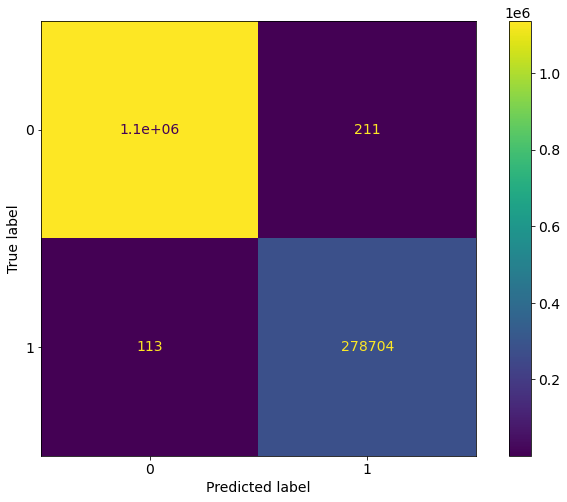

In [64]:
ConfusionMatrixDisplay.from_estimator(lgb_train50_binary, X_test50, y_test50_binary)
plt.show()

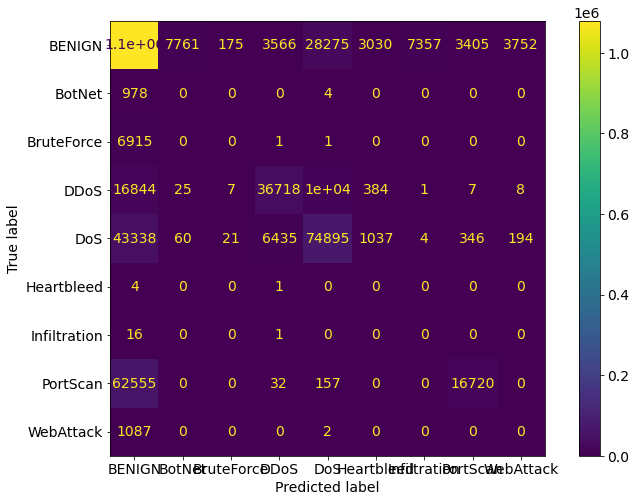

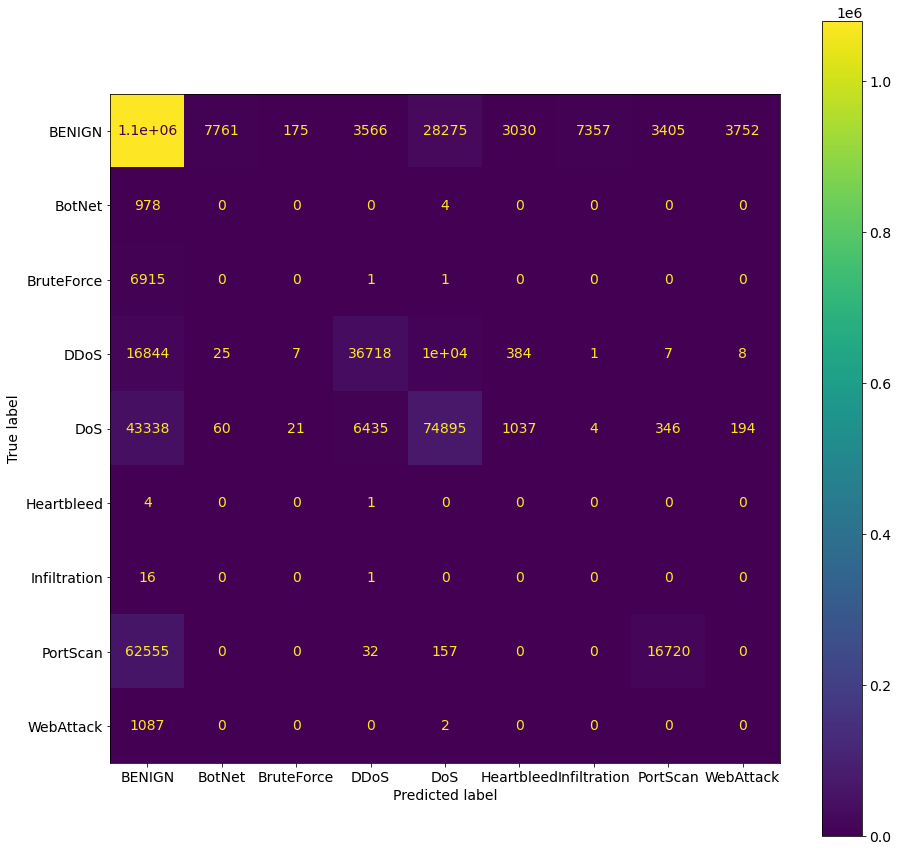

In [65]:
#ConfusionMatrixDisplay.from_estimator(xgb_train50_multiclass, X_test50, y_test50_multiclass)
#plt.show()

cm_lgb_multiclass_train = ConfusionMatrixDisplay.from_estimator(lgb_train50_multiclass, X_test50, y_test50_multiclass)
fig, ax = plt.subplots(figsize=(15,15))
cm_lgb_multiclass_train.plot(ax=ax)